# 09wk-mid

최규빈  
2023-11-01

<https://youtu.be/h5WnvWsqgtI?si=6-GRGyscR2_7BErA>

------------------------------------------------------------------------

1.  True/False를 판단하는 문제는 답만 써도 무방함.
2.  “자료분석” 문제는 “kaggle style score = 50%”, “분석의 논리 = 50%” 의
    배점으로 채점한다.
3.  “자료분석” 유형의 경우 분석의 논리가 매우 우수하거나, 창의적인
    접근법으로 분석을 시도할 경우 가산점을 부여한다. (아이디어
    단계에서도 가산점 부여가능) 가산점은 문항점수의 최대 100%까지
    부여한다.
4.  “연구” 문항의 경우 세부문항을 정확하게 수행한 경우에만 100%의 점수를
    부여하며 이를 어길시 부분점수를 부여하지 않는다. 연구결과의 시각화나
    해석이 우수한 답안은 문항점수의 20%까지 가산점을 부여한다.

------------------------------------------------------------------------

In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing 
import sklearn.model_selection
import sklearn.impute

# `1`. True/False (50점)  --------> 0.86,,

1번문제의 경우 아래에 제출하면 스스로 점수를 확인할 수 있습니다.
(중간중간 확인해가면서 푸세요)

-   <https://www.kaggle.com/t/7911b05108f642e094ce13a77a5a4723>

**`(1)-(3)`: 아래는 kaggle에서 titanic 데이터를 불러오는 코드이다.**

``` python
df_train=pd.read_csv("/kaggle/input/titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/titanic/test.csv")
```

In [522]:
# !kaggle competitions download -c titanic
# !unzip titanic.zip -d ./titanic
# df_train = pd.read_csv('titanic/train.csv')
# df_test = pd.read_csv('titanic/test.csv')
# !rm titanic.zip
# !rm -rf titanic/

`(1)` 학습을 할 때는 `df_train`만을 이용하며 `df_test`는 전혀 사용하지
않는다. T

`(2)` `df_train`과 `df_test`의 열의 숫자는 동일하며 행의 숫자만 차이가
난다. F

`(3)` 여성생존자만 모두 생존한다고 가정하면 `df_train`에서의 accuracy는
78% 이상이다. T

**`(4)-(7)` 아래는
[모듈4](https://guebin.github.io/MP2023/posts/02wk-004.html)에서 소개한
Alexis Cook의 분석코드이다.**

``` python
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_AlexisCook.csv', index=False)
print("Your submission was successfully saved!")
```

`(4)` `Alexis Cook`의 코드에서는 사용된 설명변수는 \[“Pclass”, “Sex”,
“SibSp”, “Parch”\] 이다. T

`(5)` `Alexis Cook`의 코드에서는 로지스틱모형을 이용하여 반응변수를
예측하였다. F(랜덤포레스트모형 이용)

`(6)` `model.fit(X,y)`는 train data를 학습하기 위한 코드이다. T

`(7)` test data에서의 성능을 확인하기 위해서는 아래의 코드를 사용하면
된다. F

``` python
output.score(X_test,y)
```

**`(8)-(10)` 아래는
[모듈8](https://guebin.github.io/MP2023/posts/02wk-008.html)에 소개된
코드중 일부이다.**

``` python
from autogluon.tabular import TabularDataset, TabularPredictor

# load data
...
...

# analysis
predictr = TabularPredictor("Survived")
predictr.fit(df_train,presets='best_quality')
(df_train.Survived == predictr.predict(df_train)).mean()
```

`(8)` 위의 코드에서 반응변수는 “Survived”로 설정하였다. T

`(9)` `predictr.fit(df_train,presets='best_quality')`은 train data를
학습하는 단계이다. T

`(10)` `(df_train.Survived == predictr.predict(df_train)).mean()`은
모형의 성능을 train data에서 검증하는 단계이다. T

**`(11)-(14)` 아래는
[모듈11](https://guebin.github.io/MP2023/posts/03wk-011.html)에 제시된
데이터프레임으로 선형모형의 계수값을 표현한 것이다.**

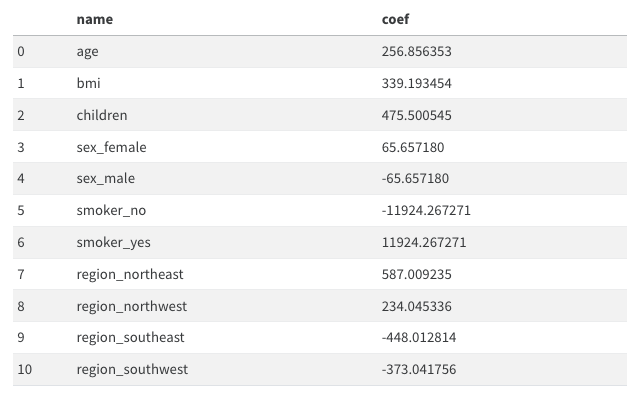

`(11)` 여성은 남성보다 평균적으로 보험료를 65.657180 만큼 더 낸다고
해석할 수 있다. <span style="color:red"> F 65.657180*2 만큼 더낸다

`(12)` 나이가 1살 증가하면 보험료가 평균 256.856353 만큼 증가한다고
해석할 수 있다. T

`(13)` 보험료를 상대적으로 많이 내는 지역과 그렇지 않은 지역이 존재한다. T

`(14)` 흡연유무는 성별보다 보험료에 미치는 영향이 크다. T 

**`(15)-(19)` 아래는
[모듈13](https://guebin.github.io/MP2023/posts/03wk-013.html)에 대한
설명이다.**

`(15)` `4.분석-실패`에서 아래와 같은 에러메시지가 나오는 이유는 train
data에 결측치가 포함되어 있기 때문이다. T

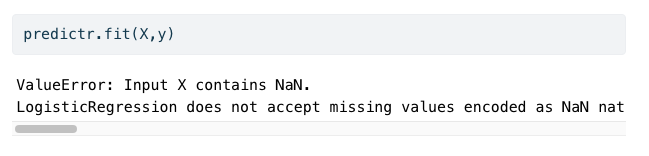

`(16)` 결측치가 하나라도 포함된 모든 열을 제거한다면 에러메시지를
피할수는 있겠으나 오버피팅이 발생할 가능성이 있다.  <span style="color:red"> F

`(17)` 따라서 결측치를 하나라도 포함된 모든 열을 제거한뒤 Lasso를 쓰면
오버피팅을 피할 수 있다. F

`(18)` 결측치가 존재할 경우, 결측치가 있는 열을 제외하고 분석하는 것이
유일한 해결방법은 아니다. 예를들면 결측치를 적당한 값으로 impute한 뒤
분석할 수도 있다. T

`(19)` train data와 test data에서 결측치가 포함된 행을 모두 제거한 뒤,
train data 를 이용하여 적합을 시키고 test data 에서 예측한뒤 제출하는
것도 가능한 분석방법 중 하나이다. 즉 아래와 같은 의사코드는 가능한
분석방법 중 하나이다. <span style="color:red"> F

``` python
df_train = 결측치가 포함된 행이 제거된 train data
df_test = 결측치가 포함된 행이 제거된 test data
X,y = df_train 을 적당히 잘 정리한 자료의 튜플형태 
XX = df_test 를 적당히 잘 정리한 자료
predictr = sklearn.linear_model.LogisticRegression()
predictr.fit(X,y)
submission = predictr.predict(XX)의 값을 적당히 제출용으로 정리하여 만든 df
```

**`(20)-(24)` 아래는
[모듈19](https://guebin.github.io/MP2023/posts/05wk-019.html),
[모듈20](https://guebin.github.io/MP2023/posts/05wk-020.html) 에 대한
설명이다.**

`(20)` `sklearn.preprocessing.MinMaxScaler()`를 이용하여 스케일러를
생성하고 train data에 `.fit_transform()` method를 적용하면 항상 $[0,1]$
사이의 값이 나온다.   T

`(21)` `sklearn.preprocessing.MinMaxScaler()`를 이용하여 스케일러는
`.inverse_transform()` method를 가지고 있으며 이는 변환된 값을 원래로
되돌리는 역할을 한다. T

`(22)` `sklearn.preprocessing.StandardScaler()`는 데이터의 평균을 0,
표준편차를 1로 만드는 방식으로 조정한다. T

`(23)` 만약에 train data와 test data로 나누어진 상황에서 스케일러를
이용하여 데이터를 변환하려면 아래와 같은 순서를 따르는 것이 하나의
방법이다. T

1.  적당한 scaler 생성이후 train data 를 입력으로 넣고
    `.fit_transform()` method 사용
2.  1과 동일한 scaler에 test data 를 입력으로 넣고 `.transform()` method
    사용

`(24)` `(23)`과 동일한 상황에서 아래와 같은 변환도 해법이 될 수 있다. F 

1.  적당한 scaler 생성이후 train data, test data를 합쳐서 입력으로 넣고
    `.fit_transform()` method 사용

**`(25)-(26)` 아래는
[모듈21](https://guebin.github.io/MP2023/posts/05wk-021.html) 에 대한
설명이다.**

`(25)` 밸런스게임을 통하여 많은 변수를 모을수록 train data 에 대한
score를 올릴 수 있다. <span style="color:red"> T

`(26)` 이 모듈의 예시는 불필요한 변수의 추가가 오히려 학습에 방해되어
test score를 낮추는 현상이 생길 수 있음을 시사한다. T

**`(27)-(33)` 아래는
[모듈22](https://guebin.github.io/MP2023/posts/06wk-022.html) 에 대한
설명이다.**

`(27)` 이 모듈의 데이터에서 `toeic`과 `toeic0`의 상관계수값은 매우 높게
나올 것이다. T

`(28)` 이 모듈의 데이터에서 모든변수를 넣고
적합한다면,`toeic, toeic0, ... ,toeic499`에 적합된 계수값의 합은 `0.01`
정도의 값을 가진다.  T 

`(29)` 이 모듈의 데이터에서 `gpa`와 `toeic`만을 남기고 나머지 변수를
제거한뒤 돌리면 test score가 향상된다. T 

`(30)` 즉 이 모듈의 데이터는 변수를 제거할수록 test score가 향상된다.
예를들면 `gpa`를 제거하여도 test score가 향상된다. F

`(31)` 이 예제에서 train score는 모든 데이터를 사용하여 적합하였을 경우
가장 높게 나타난다. T

`(32)` `toeic`, `toeic1`부터 `toeic499`까지의 변수들은 모두
`employment_score`와 높은 상관계수를 보인다. <span style="color:red">T

`(33)` 모듈22에 소개된 현상을 다중공선성이라고 말하며 이때는 계수값의
해석이 용이하지 않다. T 

**`(34)-(38)` 아래는 다중공선성과 Rigde, Lasso에 대한 종합적인
설명이다.**

`(34)` 다중공선성이 발생할 경우 올바른 변수선택으로 언제나 문제를 해결할
수 있다. F

`(35)` 다중공선성이 발생할 경우 ${\bf X}$의 correlation matrix는
단위행렬에 가깝게 나온다. F

`(36)` 다중공선성이 발생한다면 Ridge, Lasso와 같은 방법을 이용하여
해결할 수 있다. T 

`(37)` 관측치의 수가 매우커진다면 (즉 데이터프레임에서 행의 숫자가 매우
커진다면) 다중공선성 문제가 심화될 가능성이 있다. F

`(38)` 다중공선성을 아래와 같은 시각화 코드로 진단할 수 있는 경우가
있다. T 

``` python
sns.heatmap(df_train.corr(),annot=True)
```

**`(39)-(42)` 아래는
[모듈23](https://guebin.github.io/MP2023/posts/06wk-023.html) 에 대한
설명이다.**

`(39)` `toeic`, `toiec0`, …, `toeic499` 에 대응하는 계수값의 합은
$\alpha$ 와 관련없이 항상 일정하다. <span style="color:red"> F

`(40)` 이 모듈에서 큰 $\alpha$는 토익계수들의 값을 점점 비슷하게 만들어
주는 효과가 있다. T

`(41)` `toeic`, `toiec0`, …, `toeic499` 에 대응하는 계수값들의 분산은
$\alpha$가 커짐에 따라 점점 작아진다. T

`(42)` $\alpha$를 매우 잘 선택한다면 `모듈23-4.True` 에서 소개된 바와
같이 적절한 변수선택을 할 수 있다. <span style="color:red"> F

**`(43)-(44)` 아래는
[모듈25](https://guebin.github.io/MP2023/posts/06wk-025.html) 에 대한
설명이다.**

`(43)` $\alpha$가 커질수록 0이 아닌 계수값의 수는 점점 증가한다. F
 
`(44)` Lasso를 사용하면, 토익과 유사한 변수의 수가 증가할수록
test_score가 좋아진다. F

**`(45)-(47)` 아래는
[모듈27](https://guebin.github.io/MP2023/posts/06wk-027.html) 에 대한
설명이다.**

`(45)` 강의교재에 소개된 아래의 그림은 train score 보다 test score 가
낮은 상황이다. T 

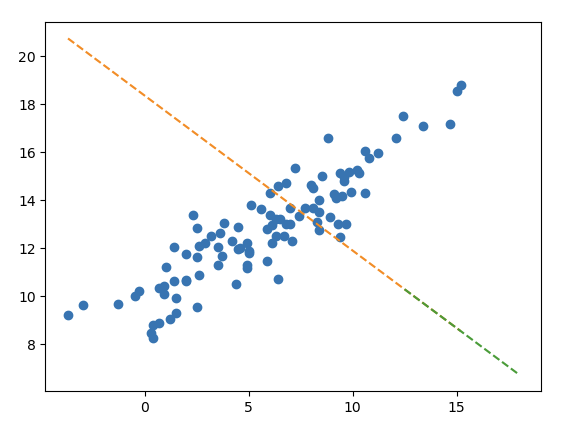

`(46)` 하지만 이러한 적합결과가 오버피팅이라고 보기는 어렵다. T

`(47)` 아웃라이어를 제거한다면 선형모형의 `df_train`, `df_test`에 대한
score가 모두 상승할 것이다. T 

**`(48)-(50)` 아래는
[모듈29](https://guebin.github.io/MP2023/posts/06wk-029.html)에 대한
설명이다.**

`(48)` `모듈29, 4.분석`에 소개된 아래와 같은 모형은

-   ${\bf X}$: `Supplement`, `Exercise`, `Supplement` $\times$
    `Exercise`
-   ${\bf y}$: `Weight_Loss`

운동을 했으며, 보조제를 사용한 경우에 발생하는 추가적인 효과를 고려할 수
있다. T 

`(49)` 이처럼 두 종류 이상의 범주형 범수가 존재하는 경우 범주형 범수간의
교호작용을 항상 고려해야 모형의 성능을 올릴 수 있다. F

`(50)` 실제로 교호작용이 있지만 이를 고려하지 않아서 모형의 성능이
떨어지는 경우는 언터피팅의 일종으로 볼 수 있다.  T



# `2`. 자료분석 (30점)

## `(1)` 아래의 자료를 해석하고 세부지침에 맞추어 분석하라.

In [286]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_test.csv')

**세부지침**

1.  반응변수 ${\bf y}$를 `sales`로 설정하고 나머지는 설명변수로
    설정하라.
2.  `df_test`에 `sales`에 대한 예측값을 포함하는 열을 추가하라.



### 데이터 살펴보기

In [287]:
df_train.head()

,temp,type,sales
0,19.4,choco,64.807407
1,0.9,vanilla,25.656697
2,7.4,vanilla,34.756650
3,4.5,choco,27.265442
4,21.1,choco,70.606946


In [288]:
df_test.head()

,temp,type
0,9.6,vanilla
1,17.4,vanilla
2,21.1,vanilla
3,21.5,choco
4,23.2,choco


In [293]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    280 non-null    float64
 1   type    280 non-null    object 
 2   sales   280 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.7+ KB


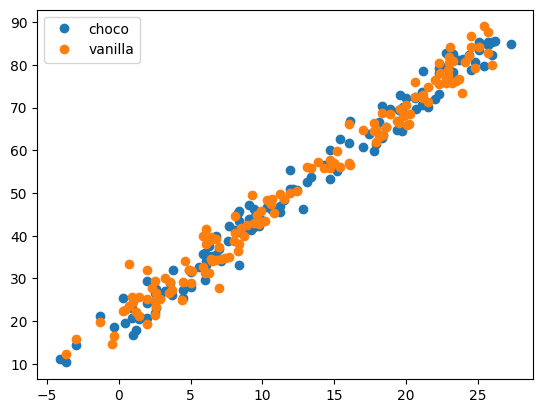

In [302]:
# plt.plot(df_train['temp'],df_train['sales'],'o')
plt.plot(df_train[df_train.type=='choco'].temp,df_train[df_train.type=='choco'].sales,'o',label='choco')
plt.plot(df_train[df_train.type=='vanilla'].temp,df_train[df_train.type=='vanilla'].sales,'o',label='vanilla')
plt.legend()

- 온도에 따라서 아이스크림의 판매량이 증가하고 있다. 

- 아이스크림 타입별로 구분이 무의미해 보인다. (교호작용이 없어 보임)

### 데이터분석

In [290]:
## step1
X = pd.get_dummies(df_train[['temp','type']])
XX = pd.get_dummies(df_test[['temp', 'type']])
y = df_train[['sales']]
## step2
predictr = sklearn.linear_model.LinearRegression() 
## step3
predictr.fit(X,y)
## step4
yhat = predictr.predict(XX)

In [307]:
df_test = df_test.assign(yhat=yhat)
df_test

,temp,type,yhat
0,9.6,vanilla,44.004419
1,17.4,vanilla,63.697748
2,21.1,vanilla,73.039456
3,21.5,choco,73.876470
4,23.2,choco,78.168606
...,...,...,...
115,5.1,choco,32.469982
116,12.8,vanilla,52.083733
117,22.9,choco,77.411170
118,8.4,vanilla,40.974676


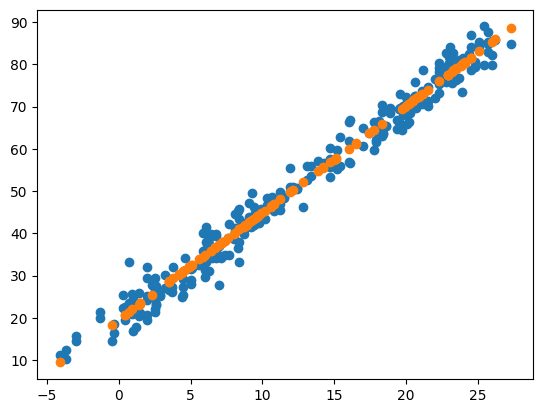

In [313]:
plt.plot(df_train['temp'],df_train['sales'],'o')
plt.plot(df_test['temp'],df_test['yhat'], 'o')

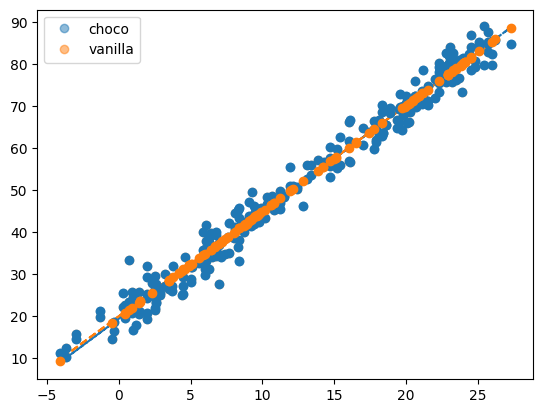

In [312]:
plt.plot(df_train[df_train.type=='choco'].temp,df_train[df_train.type=='choco'].sales,'o',label='choco',color='C0',alpha=0.5)
plt.plot(df_train[df_train.type=='choco'].temp,df_train[df_train.type=='choco'].sales_hat,'--',color='C0')
plt.plot(df_train[df_train.type=='vanilla'].temp,df_train[df_train.type=='vanilla'].sales,'o',label='vanilla',color='C1',alpha=0.5)
plt.plot(df_train[df_train.type=='vanilla'].temp,df_train[df_train.type=='vanilla'].sales_hat,'--',color='C1')
plt.plot(df_train['temp'],df_train['sales'],'o')
plt.plot(df_test['temp'],df_test['yhat'], 'o')
plt.legend()

## `(2)` 아래의 자료를 해석하고 세부지침에 맞추어 분석하라.

**세부지침**

1.  반응변수 ${\bf y}$를 `height`로 설정하고 나머지는 설명변수로
    설정하라.
2.  `df_test`에 `height`에 대한 예측값을 포함하는 열을 추가하라.


In [314]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_test.csv')

In [315]:
df_train

,weight,sex,height
0,71.169041,male,180.906857
1,69.204748,male,178.123281
2,49.037293,female,165.106085
3,74.472874,male,177.467439
4,74.239599,male,177.439925
...,...,...,...
275,72.105841,male,180.579718
276,72.008144,male,183.042456
277,48.589997,female,159.937014
278,80.803971,male,183.308227


### 데이터 살펴보기

`-` df_train 정보 확인

In [316]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  225 non-null    float64
 1   sex     280 non-null    object 
 2   height  280 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.7+ KB


In [337]:
df_train.describe()

,weight,height
count,225.000000,280.000000
mean,65.773407,174.605431
std,14.014774,9.430102
min,40.047170,148.975298
25%,51.157668,167.572671
50%,69.270680,175.186487
75%,76.642564,181.132612
max,93.505001,195.797169


In [343]:
df_train.groupby('sex').describe().T

sex               female        male
weight count   82.000000  143.000000
       mean    49.567061   75.066557
       std      4.067440    7.858717
       min     40.047170   57.802771
       25%     46.981788   70.126587
       50%     49.372279   74.953426
       75%     52.217482   80.492811
       max     59.052006   93.505001
height count  102.000000  178.000000
       mean   165.234795  179.975122
       std      6.059964    6.294408
       min    148.975298  162.860389
       25%    161.318427  176.045502
       50%    165.276189  180.058265
       75%    168.794055  183.693824
       max    183.625644  195.797169

In [317]:
df_train[df_train['weight'].isna()].head()

,weight,sex,height
10,NaN,male,181.022441
11,NaN,female,168.038585
14,NaN,female,160.925313
16,NaN,male,170.981140
29,NaN,female,173.825733


- df_train에는 NaN값이 55개 있다. NaN값을 처리하기 이전에, 해당 데이터가 어떻게 되어있는지 nan값을 제외하고 시각화를 통해 확인해보자.

In [318]:
df_train_n = df_train.dropna().reset_index(drop=True)

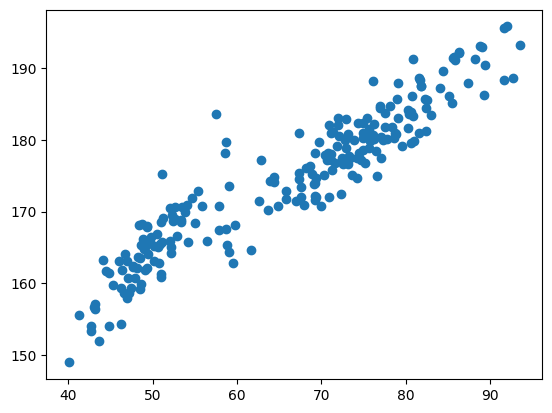

In [322]:
plt.plot(df_train_n['weight'], df_train_n['height'], 'o')

- 시각화를 해보았을 때, 성별 구분을 하지 않고 데이터를 살펴보면 일차 선형 추세보다 2차 추세가 있어보인다.

In [323]:
# step1
X = pd.get_dummies(df_train_n[['weight','sex']])
y = df_train_n['height']
# step2 
predictr = sklearn.linear_model.LinearRegression()
# step3
predictr.fit(X,y)
# step4 
df_train_n['height_hat'] = predictr.predict(X)

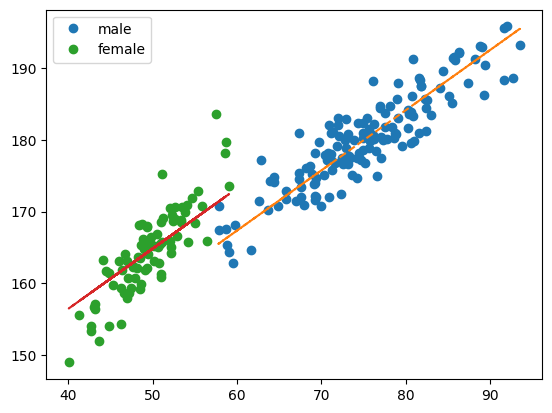

In [324]:
plt.plot(df_train_n[df_train_n.sex=='male'].weight,df_train_n[df_train_n.sex=='male'].height,'o',label='male')
plt.plot(df_train_n[df_train_n.sex=='male'].weight,df_train_n[df_train_n.sex=='male'].height_hat,'--')
plt.plot(df_train_n[df_train_n.sex=='female'].weight,df_train_n[df_train_n.sex=='female'].height,'o',label='female')
plt.plot(df_train_n[df_train_n.sex=='female'].weight,df_train_n[df_train_n.sex=='female'].height_hat,'--')
plt.legend()

- 성별을 구분하여 시각화를 해보았을때, 성별에 따라 키와 몸무게에 영향을 끼쳐 보인다.

- 여성의 경우 이상값들이 몇 개 보인다.  ------> 추후 NaN값을 대치할 때, 성별로 구분하고 이상값들은 제외하고 Impute하는게 좋을 것 같다.

In [325]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  95 non-null     float64
 1   sex     120 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


- df_test데이터에도 weight값이 있다.

In [335]:
len(df_test[df_test['sex'] == 'female'])

50

In [336]:
df_test.describe()

,weight
count,95.000000
mean,64.545461
std,14.916583
min,38.830724
25%,50.107303
50%,67.385533
75%,77.459491
max,94.486442


In [344]:
df_test.groupby('sex').describe().T

sex              female       male
weight count  40.000000  55.000000
       mean   48.780459  76.010917
       std     4.820260   7.249173
       min    38.830724  59.387691
       25%    45.780719  73.739790
       50%    48.173989  76.400941
       75%    51.791133  81.496914
       max    60.793693  94.486442

### 결측값 처리 후 데이터 분석

#### `-` 방법1 ----> drop

In [369]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_test.csv')

In [370]:
df_train_n = df_train.dropna().reset_index(drop=True)
df_test_n = df_test.dropna().reset_index(drop=True)

In [371]:
## step1
X = pd.get_dummies(df_train_n[['weight','sex']])
XX = pd.get_dummies(df_test_n[['weight', 'sex']])
y = df_train_n[['height']]
## step2
predictr = sklearn.linear_model.LinearRegression() 
## step3
predictr.fit(X,y)
## step4
yhat = predictr.predict(XX)

In [372]:
predictr.score(X,y)

0.8957997115030892

In [373]:
df_test_n['yhat'] = yhat
df_test_n

,weight,sex,yhat
0,74.405638,male,179.442840
1,45.054381,female,160.702172
2,74.040455,male,179.136628
3,59.655090,male,167.074268
4,48.318398,female,163.439103
...,...,...,...
90,82.496975,male,186.227556
91,38.830724,female,155.483536
92,48.029580,female,163.196924
93,77.731773,male,182.231857


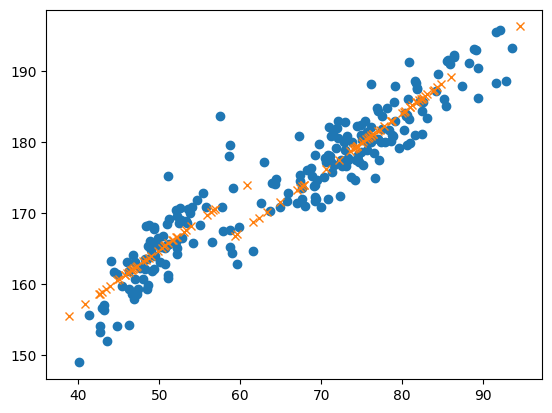

In [374]:
plt.plot(df_train_n['weight'], df_train_n['height'], 'o')
plt.plot(df_test_n['weight'], df_test_n['yhat'],'x')

- 시각화를 확인해보면, 여성의 yhat은 기울기가 좀더 가파라야 할 것 같다.

#### `-` 방법2 ----> 평균(성별구분) 대치

In [375]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_test.csv')

`-` 평균값으로 nan값 대치

In [351]:
female_mean = df_train[df_train['sex'] == 'female']['weight'].mean()
male_mean = df_train[df_train['sex'] == 'male']['weight'].mean()
(female_mean, male_mean)

(49.567060917121516, 75.06655705102078)

In [352]:
df_train.loc[(df_train['sex'] == 'female') & (df_train['weight'].isna()), 'weight'] = female_mean
df_train.loc[(df_train['sex'] == 'male') & (df_train['weight'].isna()), 'weight'] = male_mean
df_test.loc[(df_test['sex'] == 'female') & (df_test['weight'].isna()), 'weight'] = female_mean
df_test.loc[(df_test['sex'] == 'male') & (df_test['weight'].isna()), 'weight'] = male_mean

In [353]:
X = pd.get_dummies(df_train[['weight','sex']])
XX = pd.get_dummies(df_test[['weight', 'sex']])
y = df_train[['height']]
predictr = sklearn.linear_model.LinearRegression() 
predictr.fit(X,y)
yhat = predictr.predict(XX)

In [354]:
predictr.score(X,y)

0.8543631938325703

In [355]:
df_test['yhat'] = yhat
df_test

,weight,sex,yhat
0,74.405638,male,179.420931
1,45.054381,female,161.450840
2,74.040455,male,179.114719
3,59.655090,male,167.052359
4,48.318398,female,164.187771
...,...,...,...
115,48.029580,female,163.945592
116,49.567061,female,165.234795
117,75.066557,male,179.975122
118,77.731773,male,182.209948


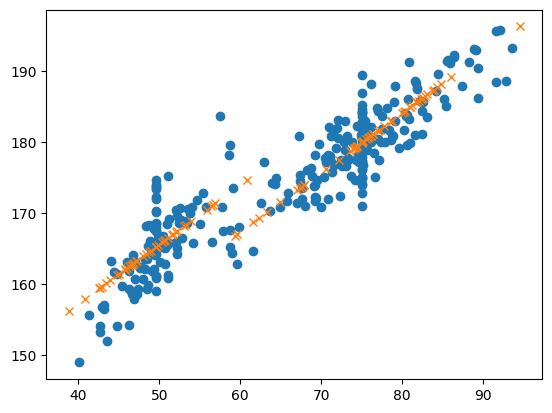

In [356]:
plt.plot(df_train['weight'], df_train['height'], 'o')
plt.plot(df_test['weight'], df_test['yhat'],'x')

- 시각화를 확인해보면, drop한 시각화 결과값과 비슷해 보임

- 결측치를 모두 평균값으로 대치하다 보니 분산이 더 커진 느낌

#### `-` 방법3 ----> drop 이후 이차선형을 해보자.

- 데이터를 처음 살펴보았을 때, 데이터가 2차 선형 추세로 보였다. 결측값을 방법1에서 진행한 drop으로 처리하고 이차선형을 진행해보자

In [383]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_test.csv')

df_train_n = df_train.dropna().reset_index(drop=True)
df_test_n = df_test.dropna().reset_index(drop=True)

In [384]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# step 1
X = pd.get_dummies(df_train_n[['weight', 'sex']])
XX = pd.get_dummies(df_test_n[['weight', 'sex']])
y = df_train_n['height']

# step 2
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
XX_ = poly.fit_transform(XX)

# step 3

predictr = LinearRegression()
predictr.fit(X_, y)

# Step 4: 예측
yhat = predictr.predict(XX_)


In [385]:
df_test_n['yhat'] = yhat
df_test_n

,weight,sex,yhat
0,74.405638,male,179.541829
1,45.054381,female,158.629433
2,74.040455,male,179.260442
3,59.655090,male,167.990971
4,48.318398,female,162.879433
...,...,...,...
90,82.496975,male,185.716853
91,38.830724,female,150.474275
92,48.029580,female,162.504119
93,77.731773,male,182.094037


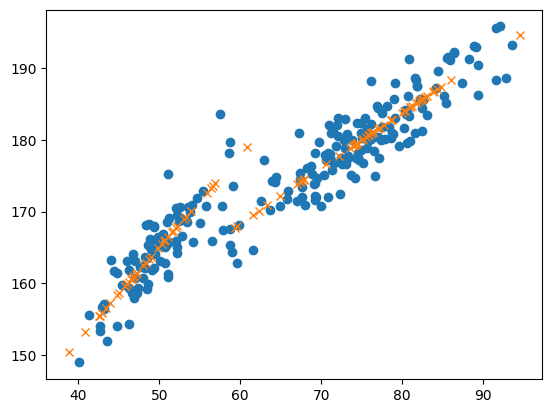

In [390]:
plt.plot(df_train_n['weight'], df_train_n['height'], 'o')
plt.plot(df_test_n['weight'], df_test_n['yhat'],'x')

- 그래프로 확인했을 때 좀 더 잘 적합된것 같다. (성별구분도 잘 되어 잇는거 같다.)

#### `-` 방법4 ----> 이상값을 제거한 평균(성별구분) 대치 (설명만..)

- 여자의 데이터를 살펴보면, 이상값들이 있어보인다. 이상값들을 제거한 새로운 df값에서 결측치를 처리하고 분석하는 것이 나아보인다.

- 이상값을 제거하기 위한 방법으로 standardscaler를 이용해 적합하는 방법도 있고, 혹은 결측치를 제거한 값에서 적합한 선형모델의 신뢰구간을 구하고 신뢰구간에서 벗어난 값들을 이상치로 추정하여 제거하는 방법도 있을 것 같다.

- 제거 후에 결측값을 처리한다.(평균 등..)


## `(3)` 아래의 자료를 해석하고 세부지침에 맞추어 분석하라.

In [438]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_test.csv')

**세부지침**

1.  반응변수 ${\bf y}$를 `y`로 설정하고 나머지 `X1`,`X2`,`X3`,`X4`는
    설명변수로 설정하라.
2.  `df_test`에 `y`에 대한 예측값을 포함하는 열을 추가하라.


### 데이터 살펴보기

- 결측값은 없다.

In [439]:
df_train.corr()

,X1,X2,X3,X4,y
X1,1.000000,0.076188,0.081018,-0.016346,0.022207
X2,0.076188,1.000000,0.908744,-0.076805,0.799140
X3,0.081018,0.908744,1.000000,-0.083198,0.912513
X4,-0.016346,-0.076805,-0.083198,1.000000,-0.027986
y,0.022207,0.799140,0.912513,-0.027986,1.000000


<Axes: >

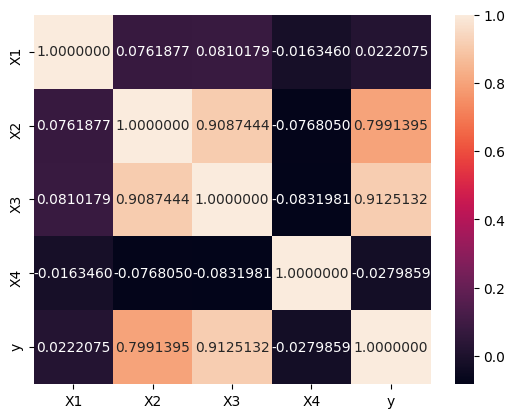

In [440]:
sns.heatmap(df_train.corr(),annot=True, fmt=".7f")  # 숫자 보여주는 옵션

- 히트맵으로 확인해 보니 (X2,X3) 의 corr이 높아보인다.

- 종속변수 y와는 X2와 X3가 corr이 높아보인다.

- 히트맵으로 확인했을 때, X2와 X3중 하나만 남겨도 좋을 것 같다.

### 데이터분석

- 데이터에 다중공산성이 있어 보인다. ridge와 lasso를 사용해보자

In [464]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_test.csv')

## step1 
X = df_train.drop(['y'],axis=1)
XX = df_test
y = df_train[['y']]

## step2
predictr = sklearn.linear_model.RidgeCV()

## step3 
predictr.fit(X,y)

## step4
yhat = predictr.predict(XX)

In [465]:
print(f'train_score: {predictr.score(X,y):.4f}')

train_score: 0.8420


In [466]:
(predictr.coef_, predictr.intercept_)

(array([[-2.33391464, -1.66406577, 13.52591532,  2.19008175]]),
 array([-10.69072811]))

In [467]:
predictr.coef_.sum()

11.718016648676223

In [468]:
df_test['yhat'] = yhat
df_test

,X1,X2,X3,X4,yhat
0,0.848150,2.120672,2.464867,0.418109,18.056099
1,0.577140,2.339529,2.704477,0.277340,21.257076
2,0.968286,1.570282,2.236010,0.791880,16.414684
3,0.065605,1.332800,1.591895,0.175372,8.854202
4,0.997962,2.216314,3.020515,0.932561,26.189631
...,...,...,...,...,...
115,0.543678,1.008793,2.192418,0.751022,17.660934
116,0.693956,1.978183,2.719313,0.267207,21.764218
117,0.405942,0.997256,1.913545,0.364545,13.383162
118,0.160230,0.253617,1.435839,0.139073,8.238895


- 릿지를 이용했을 때 X3의 계수값이 다른 계수들 값에 비해 큰 값을 가진다.

In [469]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_test.csv')

## step1 
X = df_train.drop(['y'],axis=1)
XX = df_test
y = df_train[['y']]

## step2
predictr = sklearn.linear_model.LassoCV()

## step3 
predictr.fit(X,y)

## step4
yhat = predictr.predict(XX)

/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [470]:
print(f'train_score: {predictr.score(X,y):.4f}')

train_score: 0.8321


In [471]:
(predictr.coef_, predictr.intercept_)

(array([-0.        , -0.        , 11.85387587,  0.        ]),
 -9.006433120791534)

In [472]:
predictr.coef_.sum()

11.853875870263957

In [473]:
df_test['yhat'] = yhat
df_test

,X1,X2,X3,X4,yhat
0,0.848150,2.120672,2.464867,0.418109,20.211794
1,0.577140,2.339529,2.704477,0.277340,23.052106
2,0.968286,1.570282,2.236010,0.791880,17.498951
3,0.065605,1.332800,1.591895,0.175372,9.863691
4,0.997962,2.216314,3.020515,0.932561,26.798372
...,...,...,...,...,...
115,0.543678,1.008793,2.192418,0.751022,16.982217
116,0.693956,1.978183,2.719313,0.267207,23.227970
117,0.405942,0.997256,1.913545,0.364545,13.676486
118,0.160230,0.253617,1.435839,0.139073,8.013828


- 라쏘를 이용했을 때 X3외에 다른 계수 값들은 다 0으로 추정하였다. 

- 릿지, 라쏘를 확인했을 때 X2보다 X3가 더 유의미한 변수로 보인다. X2를 제거해 보자.

In [474]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_test.csv')

## step1 
X = df_train.drop(['y','X2'],axis=1)
XX = df_test.drop(['X2'],axis=1)
y = df_train[['y']]

## step2
predictr = sklearn.linear_model.LinearRegression() 

## step3 
predictr.fit(X,y)

## step4
yhat = predictr.predict(XX)

In [475]:
print(f'train_score: {predictr.score(X,y):.4f}')

train_score: 0.8376


In [476]:
(predictr.coef_, predictr.intercept_)

(array([[-2.74165853, 12.28614251,  2.58080696]]), array([-9.88442786]))

In [477]:
df_test['yhat'] = yhat
df_test

,X1,X2,X3,X4,yhat
0,0.848150,2.120672,2.464867,0.418109,19.152999
1,0.577140,2.339529,2.704477,0.277340,22.476606
2,0.968286,1.570282,2.236010,0.791880,16.976486
3,0.065605,1.332800,1.591895,0.175372,9.946554
4,0.997962,2.216314,3.020515,0.932561,26.896733
...,...,...,...,...,...
115,0.543678,1.008793,2.192418,0.751022,17.499593
116,0.693956,1.978183,2.719313,0.267207,22.312462
117,0.405942,0.997256,1.913545,0.364545,13.453517
118,0.160230,0.253617,1.435839,0.139073,7.676122


- X2를 제거한 선형 모델이 릿지, 라쏘를 이용한 모델과 비슷한 계수값의 합이 보인다. 즉 X2와 X3는 유의한 변수로 서로 영향을 끼친다.


# `3`. 연구 (20점)

아래의 코드를 이용하여 자료를 불러오라.

In [235]:
np.random.seed(42)
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)

아래의 절차에 따라 자료를 연구하라. 결과를 해석하라.

1.  종속변수 ${\bf y}$를 `employment_score`로 설정하고 나머지는
    설명변수로 설정하라.
2.  `sklearn.linear_model.Ridge`를 이용하여
    $\alpha = [10^1, 10^{1.5}, 10^2, 10^{2.5}, \dots, 10^{9}]$에 대해
    predictor를 생성하라.
3.  $\alpha$의 변화에 따른 train score 와 test score 의 변화를
    시각화하라.
4.  $\alpha$에 변화에 따른 `predictor`가 학습한 coefficient값
    (`predictor.coef_`) 들의 분산변화와 L2-penalty를 시각화하라.

> 구현시 20점, 결과해석이 추가되면 가산점 4점

------------------------------------------------------------------------

jupyter: kernelspec: display_name: Python 3 (ipykernel) language: python
name: python3 language_info: codemirror_mode: name: ipython version: 3
file_extension: .py mimetype: text/x-python name: python
nbconvert_exporter: python pygments_lexer: ipython3 version: 3.10.13

------------------------------------------------------------------------

In [503]:
df.head()

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,1.898249,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,9.567232,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,7.726123,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,3.352731,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,8.178203,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633


In [511]:

X = df_train.drop(['employment_score'],axis=1)
XX = df_test.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
yy = df_test[['employment_score']]

alpha = [10**i for i in np.arange(1, 9, 0.5)]
Ridge_ = []
train_scores = []
test_scores = []
coef_var = []
l2 = []
for alpha in alpha:
    predictr = sklearn.linear_model.Ridge(alpha) 
    predictr.fit(X,y)
    Ridge_.append(predictr)
    train_score = predictr.score(X, y)
    train_scores.append(train_score)
    test_score = predictr.score(XX, yy)
    test_scores.append(test_score) 
    coef = predictr.coef_
    coef_var.append(np.var(coef))
    l2.append(((coef)**2).sum())

In [512]:
alpha = [10**i for i in np.arange(1, 9, 0.5)]
df2 = pd.DataFrame({'alpha':alpha, 'train score':train_scores, 'test score':test_scores, 'l2':l2}) 
df2

,alpha,train score,test score,l2
0,1.000000e+01,1.000000,0.277359,5.459046e-02
1,3.162278e+01,0.999997,0.280948,5.416616e-02
2,1.000000e+02,0.999973,0.291812,5.287783e-02
3,3.162278e+02,0.999760,0.322006,4.926543e-02
4,1.000000e+03,0.998253,0.389748,4.096235e-02
5,3.162278e+03,0.990998,0.492017,2.778880e-02
6,1.000000e+04,0.968966,0.590661,1.458607e-02
7,3.162278e+04,0.923821,0.663610,5.727399e-03
8,1.000000e+05,0.859300,0.708467,1.575327e-03
9,3.162278e+05,0.798805,0.728958,2.884292e-04


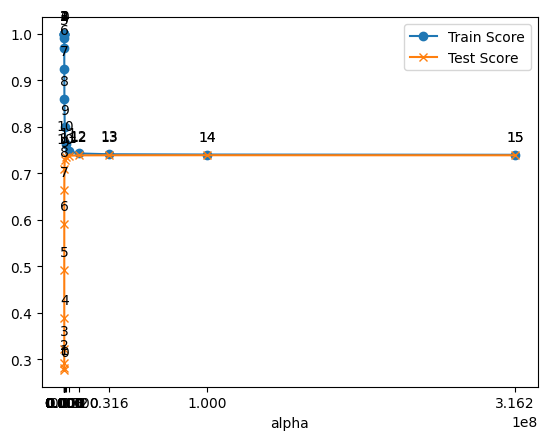

In [513]:
plt.plot(df2['alpha'], df2['train score'], label='Train Score', marker='o')
plt.plot(df2['alpha'], df2['test score'], label='Test Score', marker='x')
plt.xlabel('alpha')
plt.legend()

plt.xticks(df2['alpha'])
plt.xlabel('alpha')

for i, (x_train, y_train, x_test, y_test) in enumerate(zip(df2['alpha'], df2['train score'], df2['alpha'], df2['test score'])):
    plt.annotate(f'{i}', (x_train, y_train), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.annotate(f'{i}', (x_test, y_test), textcoords="offset points", xytext=(0, 10), ha='center')


- ridge를 이용하여 계수들의 값이 동일하게 나누는 효과가 나타난다. 

- alpha의 인덱스가 12정도 되었을 때(alpha=1.000000e+07) train/test score값이 비슷한 값을 유지한다. 이는 ridge를 이용해 패널티를 줘서 몇 개의 변수로만 특정값을 설명하기 어렵게 만들기 때문이다. 즉 계수들의 값을 서로 비슷하게 나눈다.

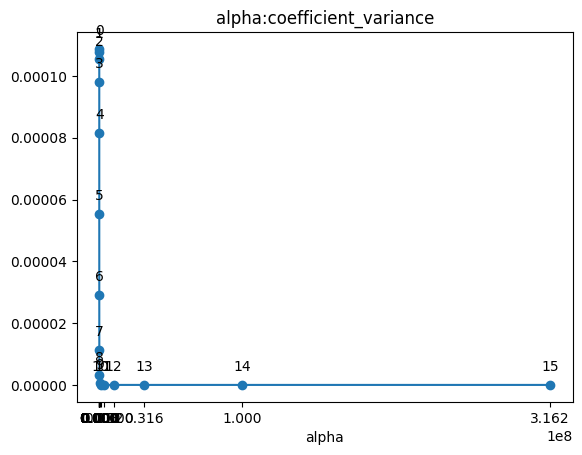

In [520]:
plt.plot(alpha, coef_var, marker='o')
plt.title('alpha:coefficient_variance')
plt.xticks(df2['alpha'])
plt.xlabel('alpha')
for i, (x, y) in enumerate(zip(alpha, coef_var)):
    plt.annotate(f'{i}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

- alpha값이 커질 수록 coef의 분산은 작아진다. alpha의 인덱스가 12정도 되었을 때는 L2-norm을 통해 계수들의 값을 비슷한 크기로 만드므로 그 이후의 coef의 분산값은 유사하게 나타난다.

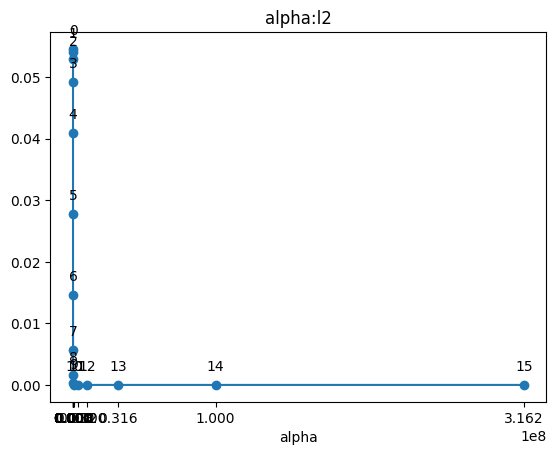

In [519]:
plt.plot(alpha, l2, marker='o')
plt.title('alpha:l2')
plt.xticks(df2['alpha'])
plt.xlabel('alpha')
for i, (x, y) in enumerate(zip(alpha, l2)):
    plt.annotate(f'{i}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

- l2 penalty값은 위의 분산 그래프와 동일하게 그려진다. 